In [1]:
import pandas as pd
import numpy as np


train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sub = pd.read_csv('sample_submission.csv')

# train['dataset_type'] = 'train'
# test['dataset_type'] = 'test'

In [2]:
train.head(10)

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL
5,id22965,"A youth passed in solitude, my best years spen...",MWS
6,id09674,"The astronomer, perhaps, at this point, took r...",EAP
7,id13515,The surcingle hung in ribands from my body.,EAP
8,id19322,I knew that you could not say to yourself 'ste...,EAP
9,id00912,I confess that neither the structure of langua...,MWS


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [4]:
train['author'].value_counts()

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

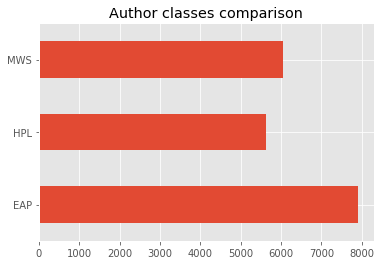

In [5]:
train['author'].value_counts().sort_index().plot('barh')
plt.title('Author classes comparison');

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
eap = train.loc[train['author'] == "EAP"]['text'][0:100]
eapDoc = ' '.join(eap)

hpl = train.loc[train['author'] == "HPL"]['text'][0:100]
hplDoc = ' '.join(hpl)

mws = train.loc[train['author'] == "MWS"]['text'][0:100]
mwsDoc = ' '.join(mws)

allDocs = [eapDoc, hplDoc, mwsDoc]

count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

countHpl = count_vec.fit([hplDoc])
bagOfHpl = count_vec.transform([hplDoc])


tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='word')
txt_fitted = tf.fit(allDocs)
txt_transformed = txt_fitted.transform(allDocs)

tf.vocabulary_

idf = tf.idf_

rr = dict(zip(txt_fitted.get_feature_names(), idf))



token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight 

,token,weight
0,abandon,2.098612
1718,pardon,2.098612
1721,particular,2.098612
1722,particulars,2.098612
1726,passable,2.098612
1727,passage,2.098612
1729,passes,2.098612
1730,passion,2.098612
1731,passport,2.098612
1733,pathway,2.098612


In [14]:
# get feature names
feature_names = np.array(tf.get_feature_names())
sorted_by_idf = np.argsort(tf.idf_)
print("Features with lowest idf:\n{}".format(
       feature_names[sorted_by_idf[:3]]))
print("\nFeatures with highest idf:\n{}".format(
       feature_names[sorted_by_idf[-3:]]))

Features with lowest idf:
['feel' 'every' 'appeared']

Features with highest idf:
['gigantic' 'genial' 'zann']
